Lo primero que hacemos es importar las principales librerias que vamos a usar,
así como el acceso a drive, para poder cargar nuestros datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

pd.options.mode.chained_assignment = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/datosTFM/Cataluña/LLEI_2022.xlsx')
df


,Ingrés / Despesa,Subsector,Agrupació,Secció,Codi Entitat,Nom Entitat,Codi Servei,Nom Servei,Capítol,Article,...,Nom Aplicació,Àrea,Política,Programa,Nom Programa,Posició pressupostària,Finançament afectat,Import sense consolidar,Import consolidat sector públic,Entitat del sector públic
0,D,Generalitat,AG,AG,1000,Generalitat,AG01,"Gab. i SG Acció Climàtica, Alim. i Ag. R",1,10,...,Retribucions bàsiques,1,12,121,Direcció i administració generals,D/100000100/1210/0000,NaN,587659.90,587659.90,X
1,D,Generalitat,AG,AG,1000,Generalitat,AG01,"Gab. i SG Acció Climàtica, Alim. i Ag. R",1,10,...,Retribucions complementàries,1,12,121,Direcció i administració generals,D/100000200/1210/0000,NaN,616290.72,616290.72,X
2,D,Generalitat,AG,AG,1000,Generalitat,AG01,"Gab. i SG Acció Climàtica, Alim. i Ag. R",1,11,...,Retribucions bàsiques,1,12,121,Direcció i administració generals,D/110000100/1210/0000,NaN,141785.46,141785.46,X
3,D,Generalitat,AG,AG,1000,Generalitat,AG01,"Gab. i SG Acció Climàtica, Alim. i Ag. R",1,11,...,Retribucions complementàries,1,12,121,Direcció i administració generals,D/110000200/1210/0000,NaN,369407.18,369407.18,X
4,D,Generalitat,AG,AG,1000,Generalitat,AG01,"Gab. i SG Acció Climàtica, Alim. i Ag. R",1,12,...,Retribucions bàsiques,1,12,121,Direcció i administració generals,D/120000100/1210/0000,NaN,31867284.20,31867284.20,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,I,Entitats dret públic,NaN,NaN,9960,Salut Catalunya Central,9960,Salut Catalunya Central,4,43,...,Del Servei Català de la Salut,0,0,0,NaN,I/430510000/0000,NaN,871004.00,0.00,X
15889,I,Entitats dret públic,NaN,NaN,9960,Salut Catalunya Central,9960,Salut Catalunya Central,8,83,...,Aportacions del Servei Català de la Salut a f...,0,0,0,NaN,I/831510000/0000,NaN,2850000.00,0.00,X
15890,I,Societats mercantils,NaN,NaN,9984,FGC Mobilitat SA,9984,FGC Mobilitat SA,8,83,...,Aportacions de capital de Ferrocarrils de la G...,0,0,0,NaN,I/832636000/0000,NaN,2700000.00,0.00,X
15891,I,Societats mercantils,NaN,NaN,9984,FGC Mobilitat SA,9984,FGC Mobilitat SA,9,91,...,Préstecs del sector públic o entitats adscrite...,0,0,0,NaN,I/910000100/0000,NaN,20000000.00,0.00,X


Una vez cargados nuestros datos, vamos a ver el tamaño de nuestro dataframe.

In [4]:
print(df.shape)
print(df.dtypes)

(15893, 22)
Ingrés / Despesa                    object
Subsector                           object
Agrupació                           object
Secció                              object
Codi Entitat                         int64
Nom Entitat                         object
Codi Servei                         object
Nom Servei                          object
Capítol                              int64
Article                              int64
Concepte                             int64
Aplicacio                            int64
Nom Aplicació                       object
Àrea                                 int64
Política                             int64
Programa                             int64
Nom Programa                        object
Posició pressupostària              object
Finançament afectat                 object
Import sense consolidar            float64
Import consolidat sector públic    float64
Entitat del sector públic           object
dtype: object


Y veamos cuales son numéricas y cuales no.

In [5]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Codi Entitat' 'Capítol' 'Article' 'Concepte' 'Aplicacio' 'Àrea'
 'Política' 'Programa' 'Import sense consolidar'
 'Import consolidat sector públic']


In [6]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Ingrés / Despesa' 'Subsector' 'Agrupació' 'Secció' 'Nom Entitat'
 'Codi Servei' 'Nom Servei' 'Nom Aplicació' 'Nom Programa'
 'Posició pressupostària' 'Finançament afectat'
 'Entitat del sector públic']


Veamos el porcentaje de datos faltantes de las columnas.


In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ingrés / Despesa - 0%
Subsector - 0%
Agrupació - 17%
Secció - 71%
Codi Entitat - 0%
Nom Entitat - 0%
Codi Servei - 0%
Nom Servei - 2%
Capítol - 0%
Article - 0%
Concepte - 0%
Aplicacio - 0%
Nom Aplicació - 0%
Àrea - 0%
Política - 0%
Programa - 0%
Nom Programa - 17%
Posició pressupostària - 0%
Finançament afectat - 93%
Import sense consolidar - 0%
Import consolidat sector públic - 0%
Entitat del sector públic - 2%


Eliminamos aquellas que tienen un alto porcentaje de datos faltantes.

In [8]:
import pandas as pd

# Calculamos de nuevo el porcentaje de datos faltantes por columna
porcentaje_faltantes_por_columna = (df.isnull().sum() / len(df)) * 100

# Establezco un umbral del 80%
umbral = 80

# Filtro las columnas que no superen el umbral de datos faltantes
columnas_a_mantener = porcentaje_faltantes_por_columna[porcentaje_faltantes_por_columna <= umbral].index

# Creo un nuevo DataFrame solo con las columnas a mantener
df = df[columnas_a_mantener]

# Ahora, 'df' contiene solo las columnas que no superan el umbral de datos faltantes (80% o menos).

Volvemos a mirar el porcentaje de datos faltantes, tras eliminar aquellas columnas que superan el umbral de datos faltantes establecido previamente.

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ingrés / Despesa - 0%
Subsector - 0%
Agrupació - 17%
Secció - 71%
Codi Entitat - 0%
Nom Entitat - 0%
Codi Servei - 0%
Nom Servei - 2%
Capítol - 0%
Article - 0%
Concepte - 0%
Aplicacio - 0%
Nom Aplicació - 0%
Àrea - 0%
Política - 0%
Programa - 0%
Nom Programa - 17%
Posició pressupostària - 0%
Import sense consolidar - 0%
Import consolidat sector públic - 0%
Entitat del sector públic - 2%


Ahora seguimos el mismo proceso, pero con las filas.

In [10]:
print("Longitud original:", len(df))
# Calculo el porcentaje de datos faltantes por fila
porcentaje_faltantes_por_fila = (df.isnull().sum(axis=1) / len(df.columns)) * 100

# Establezco un umbral del 15%
umbral = 15

# Elimino las filas que superen el umbral de datos faltantes
df = df.dropna(thresh=len(df.columns) - (umbral / 100 * len(df.columns)))

# Verifico la longitud después de la eliminación
print("Longitud después de la eliminación:", len(df))

Longitud original: 15893
Longitud después de la eliminación: 15814


Repito el proceso varias veces, hasta conseguir anular ese porcentaje.

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ingrés / Despesa - 0%
Subsector - 0%
Agrupació - 17%
Secció - 71%
Codi Entitat - 0%
Nom Entitat - 0%
Codi Servei - 0%
Nom Servei - 2%
Capítol - 0%
Article - 0%
Concepte - 0%
Aplicacio - 0%
Nom Aplicació - 0%
Àrea - 0%
Política - 0%
Programa - 0%
Nom Programa - 17%
Posició pressupostària - 0%
Import sense consolidar - 0%
Import consolidat sector públic - 0%
Entitat del sector públic - 2%


Elimino la columna "Secció" porque sigue teniendo un alto porcentaje de datos faltantes.


In [12]:
to_drop=['Secció']
df.drop(to_drop, inplace=True, axis=1)

In [13]:
print("Longitud original:", len(df))
# Calculo el porcentaje de datos faltantes por fila
porcentaje_faltantes_por_fila = (df.isnull().sum(axis=1) / len(df.columns)) * 100

# Establezco un umbral del 5%
umbral = 5

# Elimino las filas que superen el umbral de datos faltantes
df = df.dropna(thresh=len(df.columns) - (umbral / 100 * len(df.columns)))

# Verific la longitud después de la eliminación
print("Longitud después de la eliminación:", len(df))

Longitud original: 15814
Longitud después de la eliminación: 13177


In [14]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ingrés / Despesa - 0%
Subsector - 0%
Agrupació - 0%
Codi Entitat - 0%
Nom Entitat - 0%
Codi Servei - 0%
Nom Servei - 0%
Capítol - 0%
Article - 0%
Concepte - 0%
Aplicacio - 0%
Nom Aplicació - 0%
Àrea - 0%
Política - 0%
Programa - 0%
Nom Programa - 0%
Posició pressupostària - 0%
Import sense consolidar - 0%
Import consolidat sector públic - 0%
Entitat del sector públic - 2%


In [15]:
to_drop=['Entitat del sector públic']
df.drop(to_drop, inplace=True, axis=1)

In [16]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Codi Entitat' 'Capítol' 'Article' 'Concepte' 'Aplicacio' 'Àrea'
 'Política' 'Programa' 'Import sense consolidar'
 'Import consolidat sector públic']


In [17]:
print(df.shape)
print(df.dtypes)

(13177, 19)
Ingrés / Despesa                    object
Subsector                           object
Agrupació                           object
Codi Entitat                         int64
Nom Entitat                         object
Codi Servei                         object
Nom Servei                          object
Capítol                              int64
Article                              int64
Concepte                             int64
Aplicacio                            int64
Nom Aplicació                       object
Àrea                                 int64
Política                             int64
Programa                             int64
Nom Programa                        object
Posició pressupostària              object
Import sense consolidar            float64
Import consolidat sector públic    float64
dtype: object


Vamos a detectar los valores atípicos (Outlier) a través de gráficos boxplots.


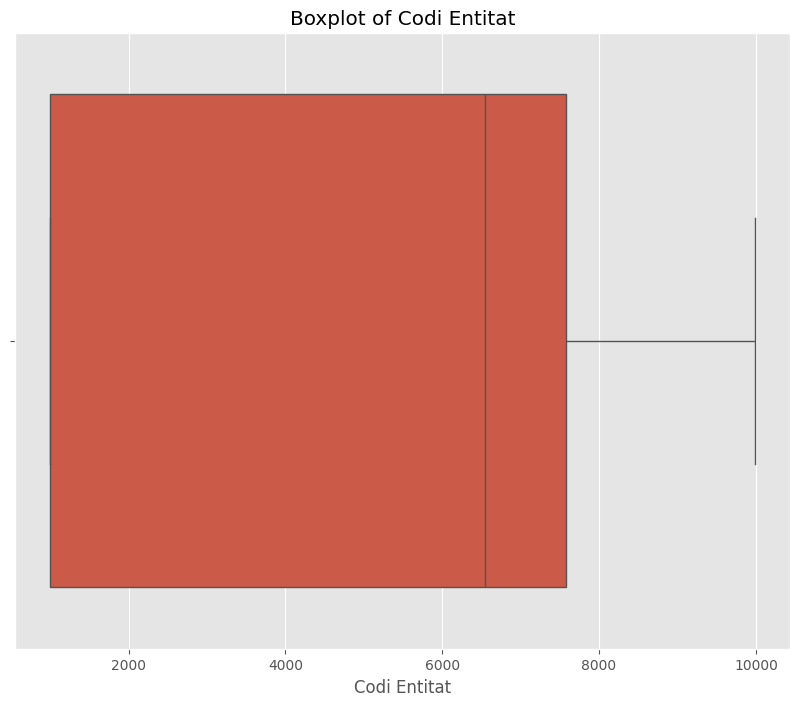

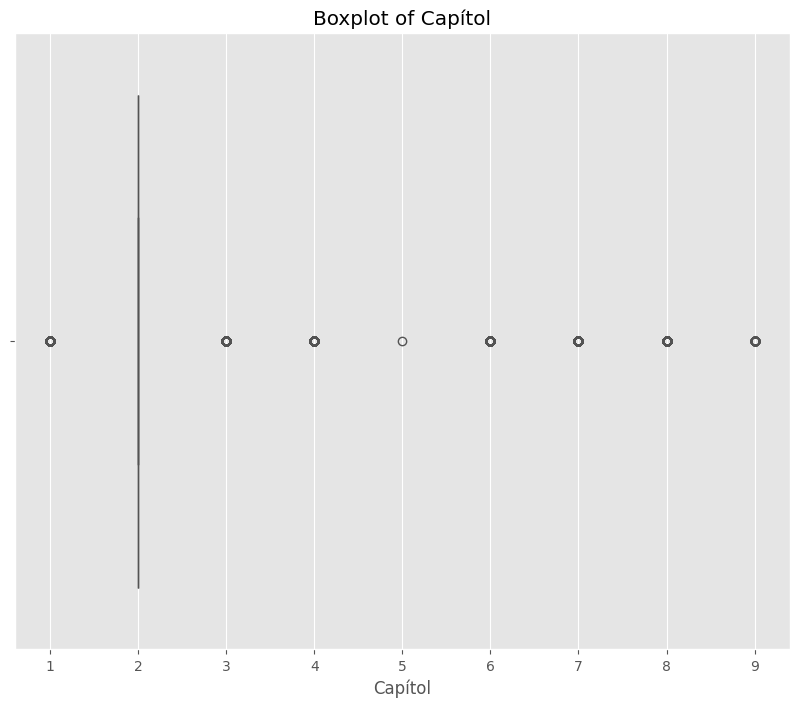

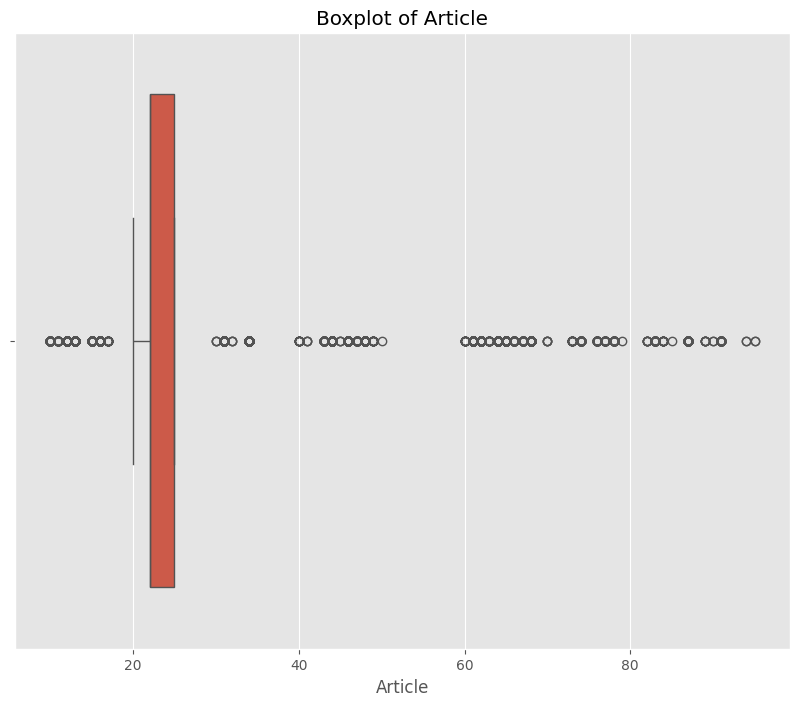

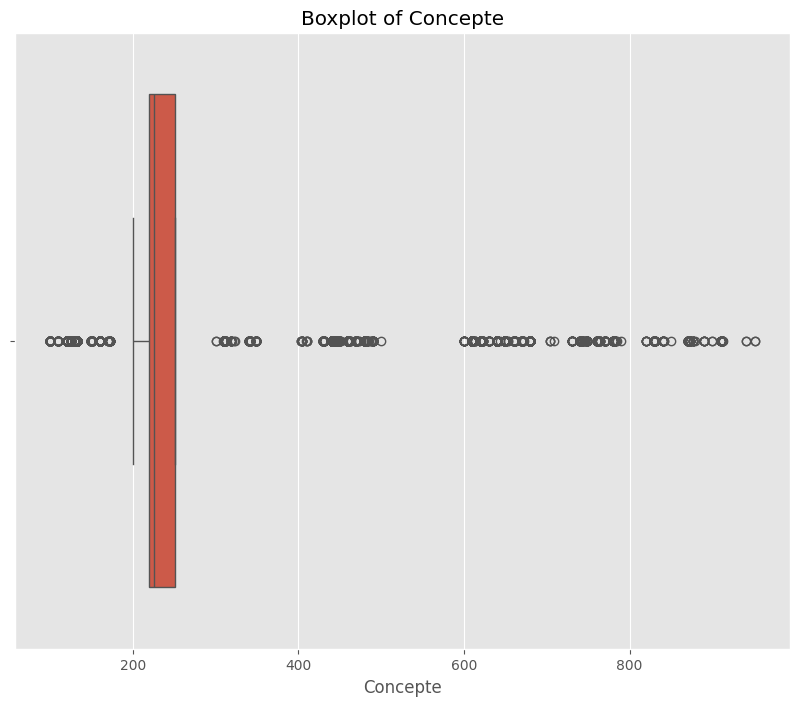

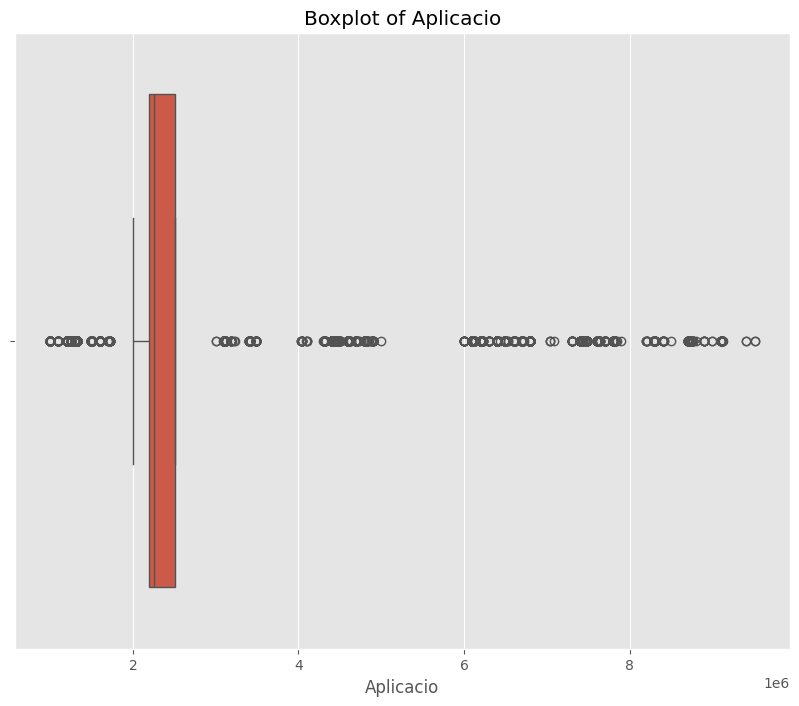

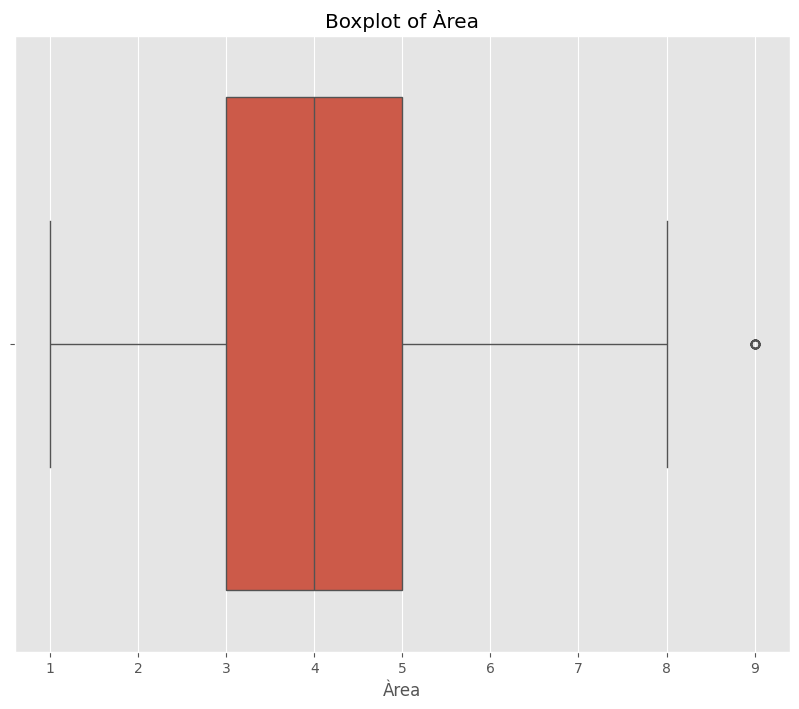

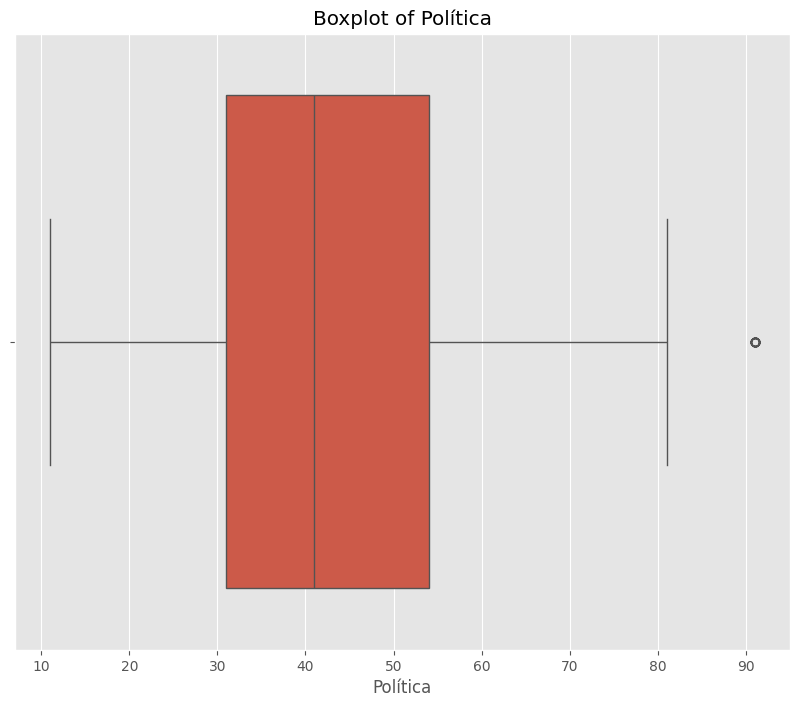

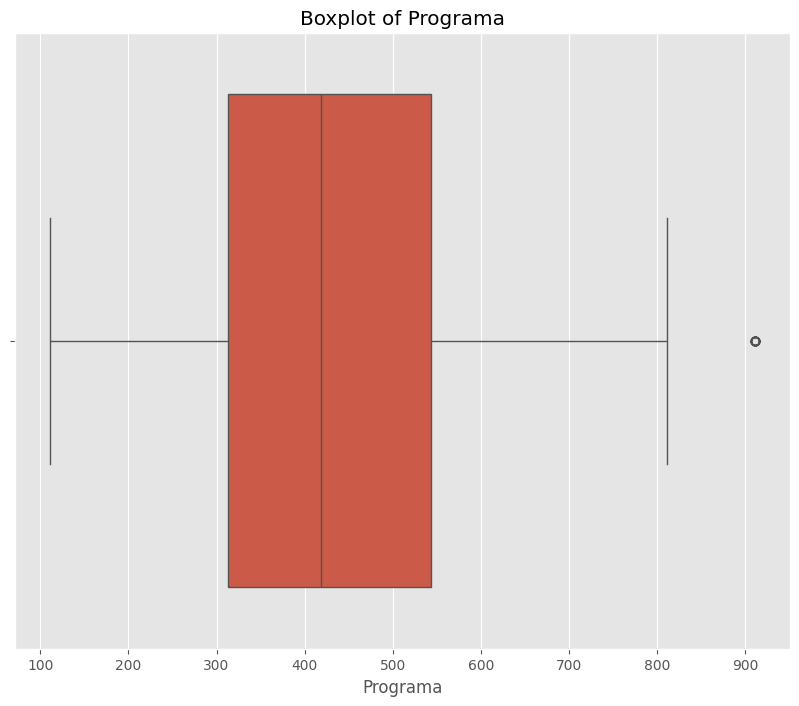

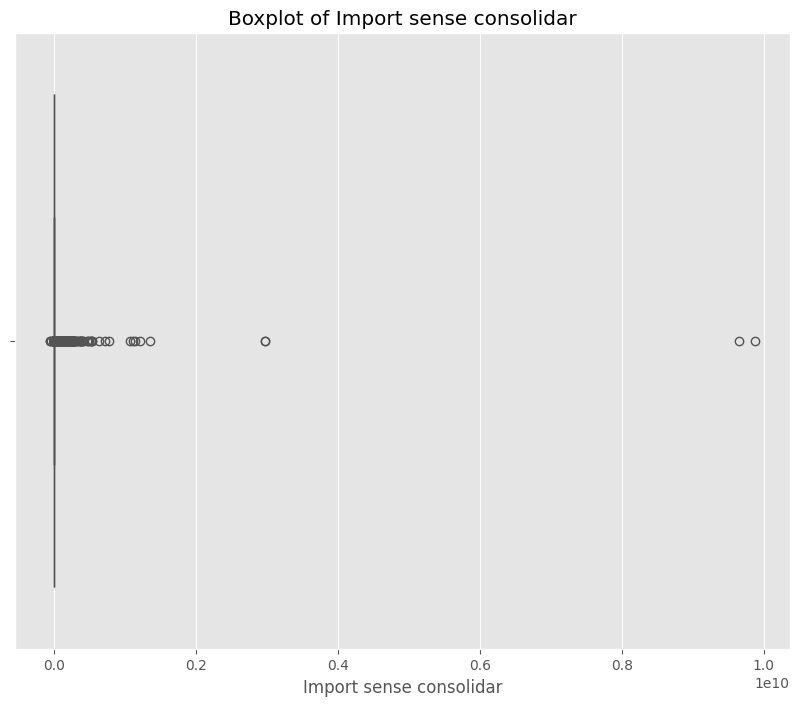

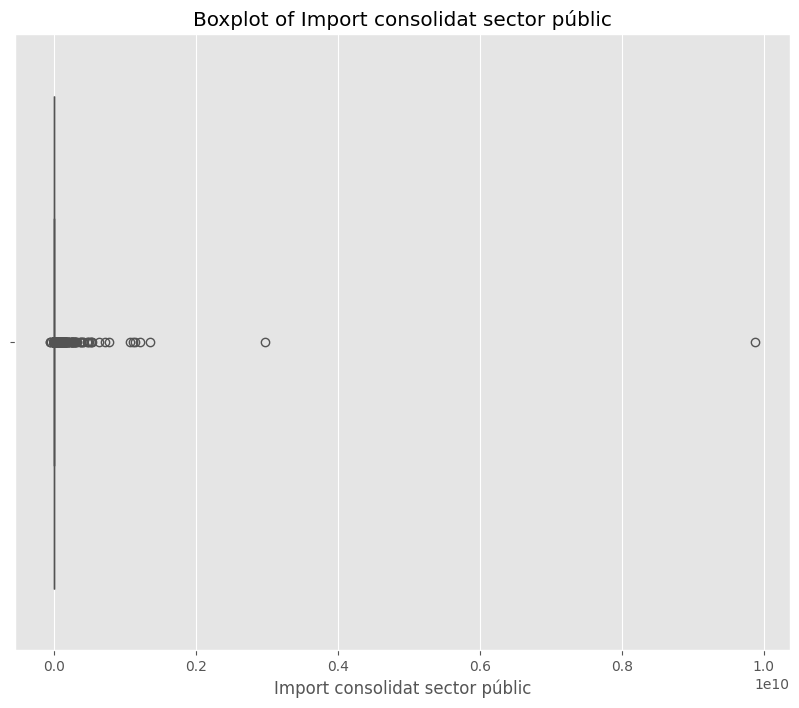

In [18]:
#Uso de gráficos como boxplots para detectar valores atípicos.

import matplotlib.pyplot as plt

for col in df_numeric.columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


# PROCESO KDD

# ETAPA 1: Selección de datos

In [18]:
# Creamos un nuevo archivo solo con las variables numéricas

import numpy as np
# Creamos un nuevo DataFrame solo co las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Lo guardamos en un nuevo archivo
df_numeric.to_csv('/content/drive/MyDrive/datosTFM/Cataluña/LLEI_2022_numeric.csv', index=False)


In [19]:
df_numeric

,Codi Entitat,Capítol,Article,Concepte,Aplicacio,Àrea,Política,Programa,Import sense consolidar,Import consolidat sector públic
0,1000,1,10,100,1000001,1,12,121,587659.90,587659.90
1,1000,1,10,100,1000002,1,12,121,616290.72,616290.72
2,1000,1,11,110,1100001,1,12,121,141785.46,141785.46
3,1000,1,11,110,1100002,1,12,121,369407.18,369407.18
4,1000,1,12,120,1200001,1,12,121,31867284.20,31867284.20
...,...,...,...,...,...,...,...,...,...,...
13172,9984,2,22,226,2260089,5,52,526,5853812.84,5853812.84
13173,9984,2,22,227,2270013,5,52,526,175000.00,175000.00
13174,9984,3,31,310,3100002,5,52,526,563223.56,563223.56
13175,9984,3,31,319,3190001,5,52,526,907200.00,907200.00


# ETAPA 2: Limpieza de datos

In [20]:
# Detectamos y eliminamos los valores outlier

z_scores = (df_numeric - df_numeric.mean()) / df_numeric.std()

threshold = 3

# Identificamos los outliers
outliers = df_numeric[(z_scores > threshold) | (z_scores < -threshold)]

# Eliminamos outliers del DataFrame
df_no_outliers = df_numeric[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


print(f"Nº de outlier eliminados: {len(outliers)}")

print(f"Tamaño del DataFrame después de eliminar los outliers: {df_no_outliers.shape}")


Nº de outlier eliminados: 13177
Tamaño del DataFrame después de eliminar los outliers: (12848, 10)


In [21]:
df_no_outliers

,Codi Entitat,Capítol,Article,Concepte,Aplicacio,Àrea,Política,Programa,Import sense consolidar,Import consolidat sector públic
0,1000,1,10,100,1000001,1,12,121,587659.90,587659.90
1,1000,1,10,100,1000002,1,12,121,616290.72,616290.72
2,1000,1,11,110,1100001,1,12,121,141785.46,141785.46
3,1000,1,11,110,1100002,1,12,121,369407.18,369407.18
4,1000,1,12,120,1200001,1,12,121,31867284.20,31867284.20
...,...,...,...,...,...,...,...,...,...,...
13172,9984,2,22,226,2260089,5,52,526,5853812.84,5853812.84
13173,9984,2,22,227,2270013,5,52,526,175000.00,175000.00
13174,9984,3,31,310,3100002,5,52,526,563223.56,563223.56
13175,9984,3,31,319,3190001,5,52,526,907200.00,907200.00


Nos saltamos la Etapa 3 del proceso, de transformación de los datos, ya que los datos seleccionados en la etapa 1, están todos en el formato con el que queremos trabajar (Float o Int) y no necesitamos transformarlos.

# Etapa 4: Minería de Datos

Comenzamos calculando y representando la matriz de correlación, para ver las variables que están más correlacionadas.

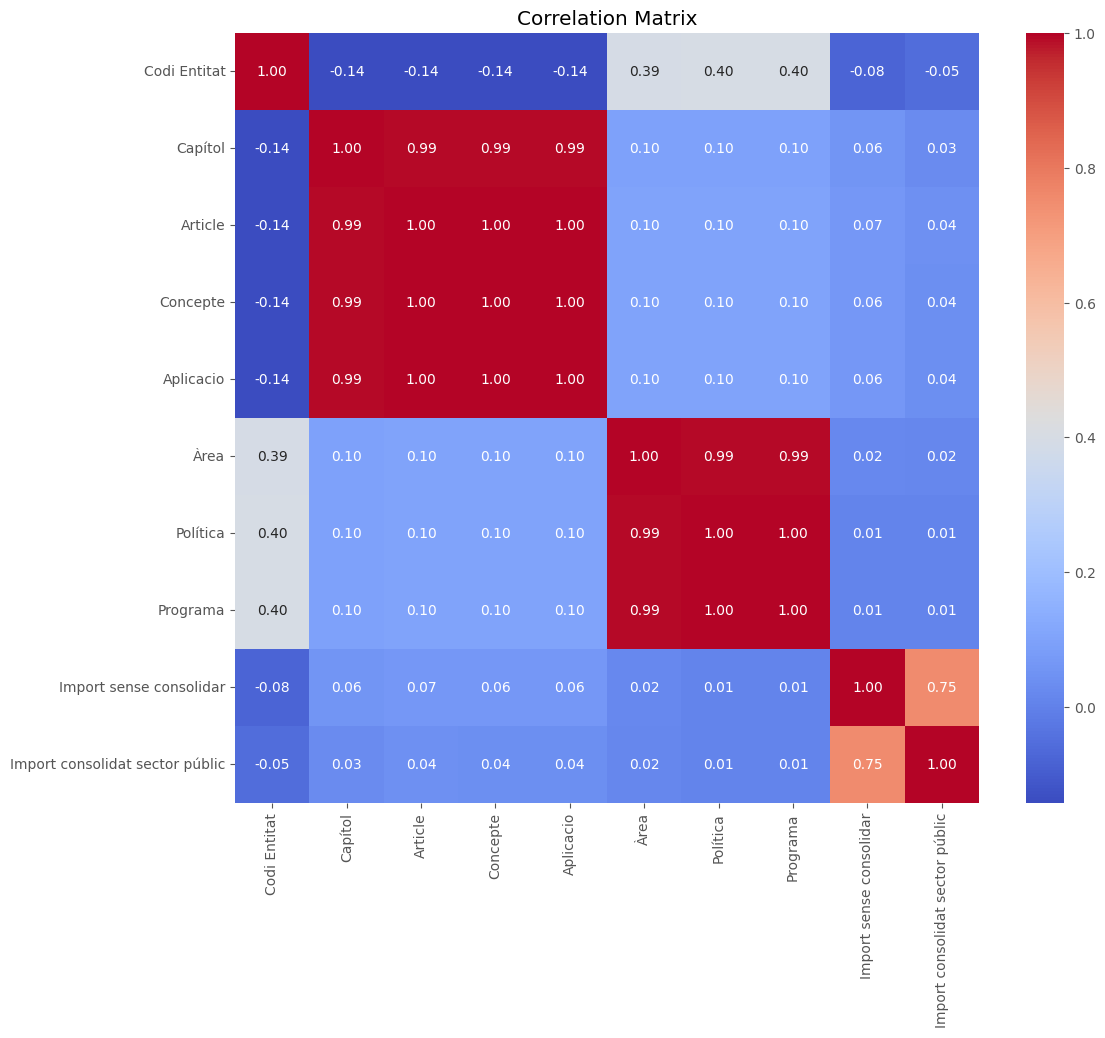

In [22]:
# Matriz de correlación

import matplotlib.pyplot as plt

correlation_matrix = df_no_outliers.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


En dicha matriz vemos que hay varias variables con un alto grado de correlación. Vamos a hacer dos estudios diferentes:


*   En primer lugar, vamos a tratar de predecir el capitol, en función del artículo, el concepto y la aplicación, ya que está bastante correlacionado con todas ellas.
*   En segundo lugar, a pesar de tener menos correlación, creemos que tiene mayor interés de estudio, y es el importe sin consolidar, a partir del importe consolidado por sector público.





In [23]:
# vamos a estudiar cual es el mejor modelo machine learning para mi conjunto de datos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionamos la variable objetivo (target) y las variables carracterísticas (features)
features = ['Article', 'Concepte', 'Aplicacio']
target = 'Capítol'

# Creamos la matriz característica (X) y el vector objetivo (y)
X = df_no_outliers[features]
y = df_no_outliers[target]

# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Entrenamos y evaluamos los modelos
results = {}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'mse': mse, 'r2': r2}

# Mostramos los resultados
for name, metrics in results.items():
  print(f'{name}:')
  print(f'  Mean Squared Error (MSE): {metrics["mse"]:.2f}')
  print(f'  R-squared (R2): {metrics["r2"]:.2f}')
  print()

# Determinamos el mejor modelo basado en R^2
best_model = max(results, key=lambda k: results[k]['r2'])
print(f'Mejor modelo basado en R2: {best_model}')


Linear Regression:
  Mean Squared Error (MSE): 0.02
  R-squared (R2): 0.99

Decision Tree Regression:
  Mean Squared Error (MSE): 0.00
  R-squared (R2): 1.00

Random Forest Regression:
  Mean Squared Error (MSE): 0.00
  R-squared (R2): 1.00

Support Vector Regression:
  Mean Squared Error (MSE): 0.02
  R-squared (R2): 0.99

Mejor modelo basado en R2: Decision Tree Regression


EL estudio anterior, nos indica que el mejor modelo para realizar es el árbol de regresión, por lo que vamos a llevarlo a cabo.

In [24]:
# Realizamos un arbol de regresión

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Seleccionamos la variable objetivo (target) y las variables carracterísticas (features)
features = ['Article', 'Concepte', 'Aplicacio']
target = 'Capítol'
# Creamos la matriz característica (X) y el vector objetivo (y)
X = df[features]
y = df[target]
# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de árbol de regresión
model = DecisionTreeRegressor()
# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)
# Evaluamos el error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")


MSE: 0.0
R2: 1.0


# ETAPA 5: Evaluación

Comienzo con la etapa de evaluación y viualización de resultados, comparando los valores reales, con las predicciones.

In [25]:
# Muestro las predicciones junto con los valores reales
import pandas as pd
resultados = pd.DataFrame({'Valor_Real': y_test, 'Predicciones': y_pred})
print(resultados)

       Valor_Real  Predicciones
12081           2           2.0
10507           2           2.0
3013            1           1.0
4091            7           7.0
2348            6           6.0
...           ...           ...
6830            1           1.0
10318           2           2.0
1042            2           2.0
2389            2           2.0
8255            2           2.0

[2636 rows x 2 columns]


In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculo métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'MAE: {mae}')

MSE: 0.0
R²: 1.0
MAE: 0.0


Veamos ahora el gráfico de los valores reales vs las predicciones.

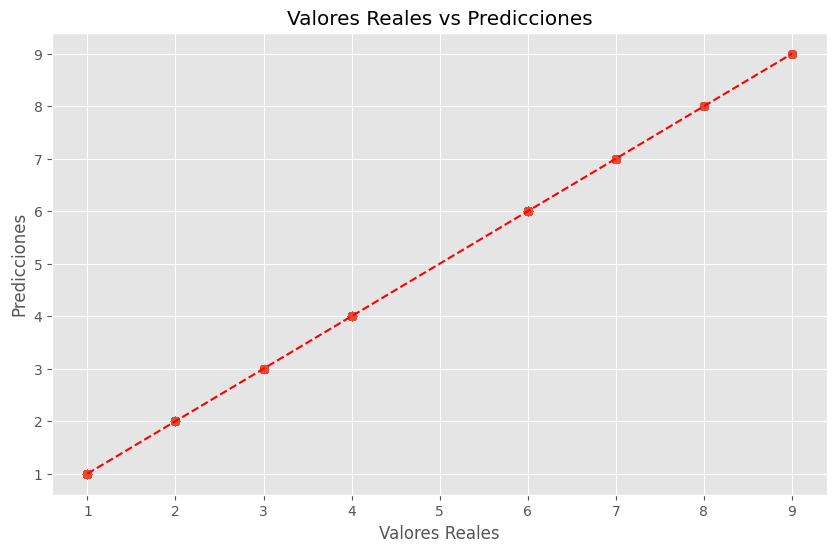

In [27]:
# Gráfico de valores reales vs predicciones

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


Vamos a volver a realizar las Etapas 4 y 5, con las nuevas variables seleccionadas para el modelo machine learning.

In [28]:
#  Mejor modelo machine learning para mi conjunto de datos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionamos la variable objetivo (target) y las variables carracterísticas (features)
features = ['Import consolidat sector públic']
target = 'Import sense consolidar'


# Creamos la matriz característica (X) y el vector objetivo (y)
X = df_no_outliers[features]
y = df_no_outliers[target]

# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iniciamos los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Entreno y evaluo los modelos
results = {}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'mse': mse, 'r2': r2}

# Muestro los resultados
for name, metrics in results.items():
  print(f'{name}:')
  print(f'  Mean Squared Error (MSE): {metrics["mse"]:.2f}')
  print(f'  R-squared (R2): {metrics["r2"]:.2f}')
  print()

# Determino el mejor modelo basado en R2
best_model = max(results, key=lambda k: results[k]['r2'])
print(f'mejor modelo basado en R2: {best_model}')

Linear Regression:
  Mean Squared Error (MSE): 119890922772268.91
  R-squared (R2): 0.44

Decision Tree Regression:
  Mean Squared Error (MSE): 115154804549237.56
  R-squared (R2): 0.47

Random Forest Regression:
  Mean Squared Error (MSE): 115138400237253.11
  R-squared (R2): 0.47

Support Vector Regression:
  Mean Squared Error (MSE): 220842959366874.53
  R-squared (R2): -0.02

mejor modelo basado en R2: Random Forest Regression


In [29]:
# Realizo un random forest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionamos la variable objetivo (target) y las variables carracterísticas (features)
features = ['Import consolidat sector públic']  # Replace with your actual feature columns
target = 'Import sense consolidar'  # Replace with your target column
# Creamos la matriz característica (X) y el vector objetivo (y)
X = df_no_outliers[features]
y = df_no_outliers[target]
# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creamos un modelo Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Entrenamos el modelo
rf_model.fit(X_train, y_train)
# Hacemos predicciones
y_pred = rf_model.predict(X_test)
# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 115154122557035.44
R-squared (R2): 0.47


In [30]:
# Muestro las predicciones junto con los valores reales
import pandas as pd
resultados = pd.DataFrame({'Valor_Real': y_test, 'Predicciones': y_pred})
print(resultados)

       Valor_Real  Predicciones
10521    51132.00    51123.7892
8       279261.72   279141.2093
8737     12982.71    12998.4465
6285    750520.15   750018.7134
3975    300000.00   300000.0000
...           ...           ...
8675        50.00       50.0000
3428    182000.00   181994.2114
7683      5000.00     5000.0000
2956      5450.00     5444.3972
2319     10000.00    10000.0000

[2570 rows x 2 columns]


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculo métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'MAE: {mae}')

MSE: 115154122557035.44
R²: 0.46558975574776273
MAE: 1191444.909124883


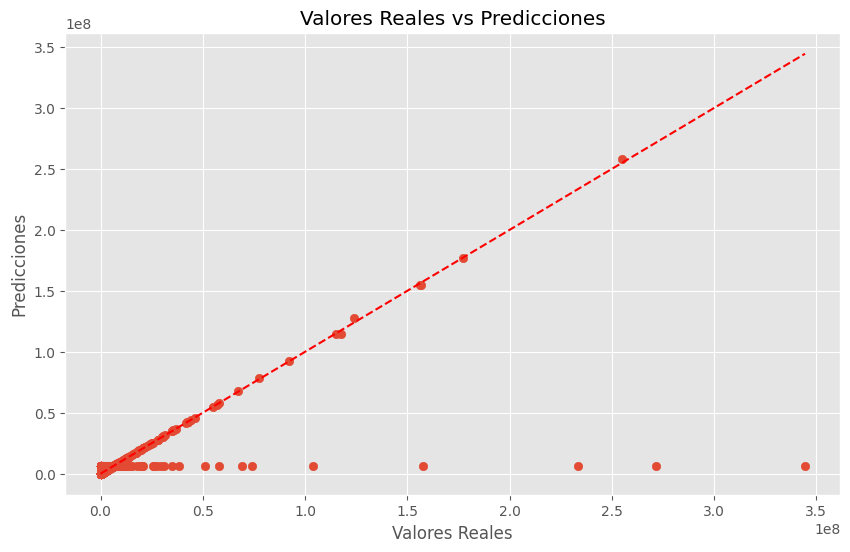

In [32]:
# Gráfico de valores reales vs predicciones

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
